In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from matplotlib.animation import FuncAnimation
from PIL import Image
from tqdm import tqdm
from scipy.signal import correlate2d
import cv2
from scipy import ndimage, datasets
import time
from scipy.interpolate import griddata

np.set_printoptions(precision=2)

In [7]:
height, width = 256, 256
n_pts = 10

def in_bounds(r, c):
    return 0 <= r < height and 0 <= c < width

colors = [int(255 * n / n_pts) for n in range(n_pts)]
point_centers = [None for _ in range(n_pts)]

voronoi = -1 * np.ones((height, width))
seeds = np.empty((height, width, 2))

for i in range(n_pts):
    x, y = np.random.randint(0, height - 1, 2)
    while voronoi[y, x] > 0:
        x, y = np.random.randint(0, height - 1, 2)

    voronoi[y, x] = colors[i]
    seeds[y, x] = [y, x]

    point_centers[i] = (y, x)

In [8]:
step_sizes = [height]

while step_sizes[-1] > 1:
    step_sizes.append(step_sizes[-1] // 2)

step_sizes += [2, 1]
# step_sizes += step_sizes

print(f"Step sizes: {step_sizes}")

Step sizes: [256, 128, 64, 32, 16, 8, 4, 2, 1, 2, 1]


In [13]:
def dist(p, q):
    return np.linalg.norm(q - p)

for k in range(len(step_sizes)):
    new_voronoi = voronoi.copy()
    new_seeds = seeds.copy()

    l = step_sizes[k]
    print(f"Searching k={l}....")

    for r in range(height):
        for c in range(width):
            # Iterate over 8 neighbors
            offsets = [-l, 0, l]
            for dr in offsets:
                for dc in offsets:
                    rr = r + dr
                    cc = c + dc

                    if not in_bounds(rr, cc): continue

                    if voronoi[r, c] < 0 and voronoi[rr, cc] >= 0:
                        new_voronoi[r, c] = new_voronoi[rr, cc]
                        new_seeds[r, c] = new_seeds[rr, cc]
                    elif voronoi[r, c] >= 0 and voronoi[rr, cc] >= 0:
                        if dist((r, c), seeds[r, c]) > dist((r, c), seeds[rr, cc]):
                            new_voronoi[r, c] = new_voronoi[rr, cc]
                            new_seeds[r, c] = new_seeds[rr, cc]

    voronoi, new_voronoi = new_voronoi, voronoi
    seeds, new_seeds = new_seeds, seeds


Searching k=256....
Searching k=128....
Searching k=64....
Searching k=32....
Searching k=16....
Searching k=8....
Searching k=4....
Searching k=2....
Searching k=1....
Searching k=2....
Searching k=1....


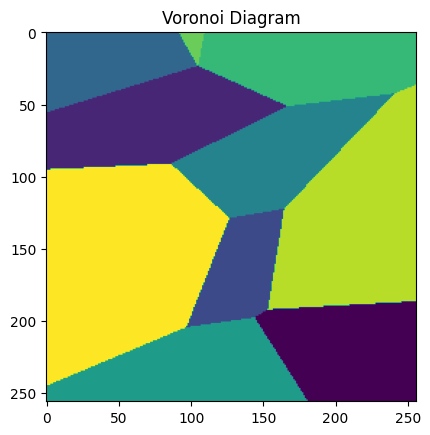

In [14]:
plt.imshow(voronoi)
plt.title("Voronoi Diagram")
plt.show()